In [3]:
import numpy as np                               #basically an array
import pandas as pd                              #reading and analyze csv
import matplotlib.pyplot as plt                  #data visualisation
import cv2                                       #comp. vision, image processing, uses numpy as images are 2D array(matrices)
import tensorflow as tf                          #creating neural network (collect, build, train, evaluate, predict)
from PIL import Image                            #manipulate images in python
import os                                        #directory control
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical           #one-hot encoding
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import tqdm                                     #progress bar
import warnings

In [4]:
data = []
labels = []
classes = 43

for i in range(classes):
    path = os.path.join(os.getcwd(),'train',str(i))
    images = os.listdir(path)
    
    for j in images:
        try:
            image = Image.open(path + '\\'+ j)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [5]:
#Converting lists into numpy arrays bcoz its faster and takes lesser memory
data = np.array(data)
labels = np.array(labels)

In [6]:
print(data.shape, labels.shape)
# Total Images:39209 of size (30*30*3(3 Means Color)) 

(39209, 30, 30, 3) (39209,)


In [7]:
data[39000] #peaking

array([[[17, 17, 19],
        [18, 18, 19],
        [18, 17, 18],
        ...,
        [20, 19, 23],
        [21, 19, 21],
        [21, 20, 21]],

       [[17, 19, 23],
        [18, 19, 20],
        [19, 19, 20],
        ...,
        [22, 21, 22],
        [24, 23, 24],
        [21, 21, 22]],

       [[20, 24, 26],
        [16, 18, 20],
        [17, 18, 20],
        ...,
        [20, 19, 21],
        [21, 20, 21],
        [19, 19, 19]],

       ...,

       [[20, 20, 25],
        [19, 19, 24],
        [19, 18, 23],
        ...,
        [30, 28, 32],
        [19, 22, 27],
        [18, 19, 24]],

       [[19, 19, 24],
        [17, 17, 22],
        [18, 17, 22],
        ...,
        [22, 26, 31],
        [18, 25, 31],
        [18, 24, 31]],

       [[16, 17, 21],
        [16, 16, 20],
        [17, 16, 21],
        ...,
        [46, 56, 74],
        [43, 54, 73],
        [42, 53, 73]]], dtype=uint8)

In [8]:
labels[4900]

3

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=68)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [10]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367, 43) (7842, 43)


In [11]:
y_train[20000]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

warnings.filterwarnings("ignore", category=DeprecationWarning)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)         

In [15]:
history = model.fit(X_train, y_train, batch_size=32, epochs=2, validation_data=(X_test, y_test))
#Final trainig of model

warnings.filterwarnings("ignore", category=DeprecationWarning)


Train on 31367 samples, validate on 7842 samples
Epoch 1/2


 5888/31367 [====>.........................] - ETA: 18:17 - loss: 89.0734 - accuracy: 0.0000e+ - ETA: 10:02 - loss: 67.9038 - accuracy: 0.0000e+ - ETA: 7:18 - loss: 53.7744 - accuracy: 0.0104     - ETA: 5:57 - loss: 43.9581 - accuracy: 0.015 - ETA: 5:08 - loss: 37.7971 - accuracy: 0.012 - ETA: 4:35 - loss: 32.5052 - accuracy: 0.020 - ETA: 4:12 - loss: 28.5090 - accuracy: 0.031 - ETA: 3:54 - loss: 25.5530 - accuracy: 0.027 - ETA: 3:41 - loss: 23.2134 - accuracy: 0.024 - ETA: 3:30 - loss: 21.2898 - accuracy: 0.021 - ETA: 3:22 - loss: 19.7133 - accuracy: 0.025 - ETA: 3:13 - loss: 18.3829 - accuracy: 0.031 - ETA: 3:07 - loss: 17.2486 - accuracy: 0.031 - ETA: 3:01 - loss: 16.2887 - accuracy: 0.029 - ETA: 2:57 - loss: 15.4527 - accuracy: 0.031 - ETA: 2:52 - loss: 14.7212 - accuracy: 0.031 - ETA: 2:48 - loss: 14.0714 - accuracy: 0.031 - ETA: 2:45 - loss: 13.4950 - accuracy: 0.031 - ETA: 2:42 - loss: 12.9784 - accuracy: 0.036 - ETA: 2:39 - loss: 12.5134 - accuracy: 0.037 - ETA: 2:37 - loss: 12

11840/31367 [==========>...................] - ETA: 1:37 - loss: 4.1588 - accuracy: 0.19 - ETA: 1:36 - loss: 4.1511 - accuracy: 0.19 - ETA: 1:36 - loss: 4.1445 - accuracy: 0.19 - ETA: 1:36 - loss: 4.1382 - accuracy: 0.19 - ETA: 1:36 - loss: 4.1294 - accuracy: 0.19 - ETA: 1:36 - loss: 4.1189 - accuracy: 0.19 - ETA: 1:35 - loss: 4.1106 - accuracy: 0.19 - ETA: 1:35 - loss: 4.1040 - accuracy: 0.19 - ETA: 1:35 - loss: 4.0930 - accuracy: 0.19 - ETA: 1:35 - loss: 4.0850 - accuracy: 0.20 - ETA: 1:35 - loss: 4.0780 - accuracy: 0.20 - ETA: 1:35 - loss: 4.0690 - accuracy: 0.20 - ETA: 1:35 - loss: 4.0600 - accuracy: 0.20 - ETA: 1:34 - loss: 4.0502 - accuracy: 0.20 - ETA: 1:34 - loss: 4.0430 - accuracy: 0.20 - ETA: 1:34 - loss: 4.0365 - accuracy: 0.20 - ETA: 1:34 - loss: 4.0288 - accuracy: 0.20 - ETA: 1:34 - loss: 4.0195 - accuracy: 0.20 - ETA: 1:34 - loss: 4.0131 - accuracy: 0.20 - ETA: 1:34 - loss: 4.0051 - accuracy: 0.21 - ETA: 1:33 - loss: 3.9977 - accuracy: 0.21 - ETA: 1:33 - loss: 3.9916 - ac

17792/31367 [================>.............] - ETA: 1:12 - loss: 3.2414 - accuracy: 0.29 - ETA: 1:11 - loss: 3.2383 - accuracy: 0.29 - ETA: 1:11 - loss: 3.2343 - accuracy: 0.29 - ETA: 1:11 - loss: 3.2307 - accuracy: 0.29 - ETA: 1:11 - loss: 3.2277 - accuracy: 0.29 - ETA: 1:11 - loss: 3.2238 - accuracy: 0.29 - ETA: 1:11 - loss: 3.2196 - accuracy: 0.29 - ETA: 1:11 - loss: 3.2165 - accuracy: 0.29 - ETA: 1:10 - loss: 3.2137 - accuracy: 0.29 - ETA: 1:10 - loss: 3.2100 - accuracy: 0.29 - ETA: 1:10 - loss: 3.2080 - accuracy: 0.29 - ETA: 1:10 - loss: 3.2044 - accuracy: 0.29 - ETA: 1:10 - loss: 3.2019 - accuracy: 0.29 - ETA: 1:10 - loss: 3.1988 - accuracy: 0.29 - ETA: 1:10 - loss: 3.1961 - accuracy: 0.29 - ETA: 1:09 - loss: 3.1933 - accuracy: 0.29 - ETA: 1:09 - loss: 3.1903 - accuracy: 0.29 - ETA: 1:09 - loss: 3.1873 - accuracy: 0.29 - ETA: 1:09 - loss: 3.1840 - accuracy: 0.30 - ETA: 1:09 - loss: 3.1805 - accuracy: 0.30 - ETA: 1:09 - loss: 3.1774 - accuracy: 0.30 - ETA: 1:09 - loss: 3.1737 - ac

23744/31367 [=====================>........] - ETA: 49s - loss: 2.7730 - accuracy: 0.357 - ETA: 49s - loss: 2.7711 - accuracy: 0.358 - ETA: 48s - loss: 2.7684 - accuracy: 0.358 - ETA: 48s - loss: 2.7668 - accuracy: 0.358 - ETA: 48s - loss: 2.7648 - accuracy: 0.359 - ETA: 48s - loss: 2.7629 - accuracy: 0.359 - ETA: 48s - loss: 2.7608 - accuracy: 0.359 - ETA: 48s - loss: 2.7582 - accuracy: 0.360 - ETA: 48s - loss: 2.7563 - accuracy: 0.360 - ETA: 48s - loss: 2.7545 - accuracy: 0.360 - ETA: 47s - loss: 2.7528 - accuracy: 0.361 - ETA: 47s - loss: 2.7507 - accuracy: 0.361 - ETA: 47s - loss: 2.7486 - accuracy: 0.362 - ETA: 47s - loss: 2.7472 - accuracy: 0.362 - ETA: 47s - loss: 2.7451 - accuracy: 0.362 - ETA: 47s - loss: 2.7432 - accuracy: 0.362 - ETA: 47s - loss: 2.7414 - accuracy: 0.362 - ETA: 47s - loss: 2.7395 - accuracy: 0.363 - ETA: 47s - loss: 2.7372 - accuracy: 0.363 - ETA: 46s - loss: 2.7356 - accuracy: 0.363 - ETA: 46s - loss: 2.7338 - accuracy: 0.363 - ETA: 46s - loss: 2.7309 - acc

29728/31367 [===========================>..] - ETA: 27s - loss: 2.4671 - accuracy: 0.408 - ETA: 27s - loss: 2.4658 - accuracy: 0.408 - ETA: 26s - loss: 2.4641 - accuracy: 0.408 - ETA: 26s - loss: 2.4626 - accuracy: 0.409 - ETA: 26s - loss: 2.4616 - accuracy: 0.409 - ETA: 26s - loss: 2.4604 - accuracy: 0.409 - ETA: 26s - loss: 2.4586 - accuracy: 0.409 - ETA: 26s - loss: 2.4564 - accuracy: 0.409 - ETA: 26s - loss: 2.4551 - accuracy: 0.410 - ETA: 26s - loss: 2.4536 - accuracy: 0.410 - ETA: 26s - loss: 2.4519 - accuracy: 0.410 - ETA: 25s - loss: 2.4508 - accuracy: 0.410 - ETA: 25s - loss: 2.4493 - accuracy: 0.411 - ETA: 25s - loss: 2.4475 - accuracy: 0.411 - ETA: 25s - loss: 2.4466 - accuracy: 0.411 - ETA: 25s - loss: 2.4451 - accuracy: 0.412 - ETA: 25s - loss: 2.4438 - accuracy: 0.412 - ETA: 25s - loss: 2.4422 - accuracy: 0.412 - ETA: 25s - loss: 2.4411 - accuracy: 0.413 - ETA: 24s - loss: 2.4395 - accuracy: 0.413 - ETA: 24s - loss: 2.4382 - accuracy: 0.413 - ETA: 24s - loss: 2.4370 - acc

31367/31367 [==============================] - ETA: 5s - loss: 2.2316 - accuracy: 0.45 - ETA: 5s - loss: 2.2306 - accuracy: 0.45 - ETA: 5s - loss: 2.2293 - accuracy: 0.45 - ETA: 5s - loss: 2.2282 - accuracy: 0.45 - ETA: 5s - loss: 2.2271 - accuracy: 0.45 - ETA: 5s - loss: 2.2258 - accuracy: 0.45 - ETA: 5s - loss: 2.2246 - accuracy: 0.45 - ETA: 4s - loss: 2.2230 - accuracy: 0.45 - ETA: 4s - loss: 2.2216 - accuracy: 0.45 - ETA: 4s - loss: 2.2204 - accuracy: 0.45 - ETA: 4s - loss: 2.2198 - accuracy: 0.45 - ETA: 4s - loss: 2.2194 - accuracy: 0.45 - ETA: 4s - loss: 2.2182 - accuracy: 0.45 - ETA: 4s - loss: 2.2169 - accuracy: 0.45 - ETA: 4s - loss: 2.2158 - accuracy: 0.45 - ETA: 3s - loss: 2.2151 - accuracy: 0.45 - ETA: 3s - loss: 2.2137 - accuracy: 0.45 - ETA: 3s - loss: 2.2126 - accuracy: 0.45 - ETA: 3s - loss: 2.2113 - accuracy: 0.45 - ETA: 3s - loss: 2.2098 - accuracy: 0.45 - ETA: 3s - loss: 2.2087 - accuracy: 0.45 - ETA: 3s - loss: 2.2073 - accuracy: 0.45 - ETA: 3s - loss: 2.2059 - accu

 5952/31367 [====>.........................] - ETA: 1:50 - loss: 1.3253 - accuracy: 0.68 - ETA: 1:46 - loss: 1.5570 - accuracy: 0.62 - ETA: 1:52 - loss: 1.4508 - accuracy: 0.62 - ETA: 1:52 - loss: 1.3507 - accuracy: 0.62 - ETA: 1:53 - loss: 1.4130 - accuracy: 0.60 - ETA: 1:51 - loss: 1.3601 - accuracy: 0.61 - ETA: 1:51 - loss: 1.3375 - accuracy: 0.61 - ETA: 1:53 - loss: 1.2875 - accuracy: 0.63 - ETA: 1:55 - loss: 1.2664 - accuracy: 0.63 - ETA: 1:56 - loss: 1.2220 - accuracy: 0.64 - ETA: 1:57 - loss: 1.2130 - accuracy: 0.65 - ETA: 1:57 - loss: 1.1851 - accuracy: 0.66 - ETA: 1:57 - loss: 1.1635 - accuracy: 0.66 - ETA: 1:57 - loss: 1.1514 - accuracy: 0.67 - ETA: 1:58 - loss: 1.1338 - accuracy: 0.67 - ETA: 1:57 - loss: 1.1334 - accuracy: 0.68 - ETA: 1:57 - loss: 1.1261 - accuracy: 0.68 - ETA: 1:57 - loss: 1.1316 - accuracy: 0.68 - ETA: 1:57 - loss: 1.1187 - accuracy: 0.68 - ETA: 1:56 - loss: 1.1593 - accuracy: 0.68 - ETA: 1:56 - loss: 1.1567 - accuracy: 0.68 - ETA: 1:56 - loss: 1.1671 - ac

11904/31367 [==========>...................] - ETA: 1:29 - loss: 1.1097 - accuracy: 0.68 - ETA: 1:29 - loss: 1.1077 - accuracy: 0.68 - ETA: 1:29 - loss: 1.1075 - accuracy: 0.68 - ETA: 1:29 - loss: 1.1083 - accuracy: 0.68 - ETA: 1:29 - loss: 1.1067 - accuracy: 0.68 - ETA: 1:29 - loss: 1.1096 - accuracy: 0.68 - ETA: 1:28 - loss: 1.1091 - accuracy: 0.68 - ETA: 1:28 - loss: 1.1094 - accuracy: 0.68 - ETA: 1:28 - loss: 1.1075 - accuracy: 0.68 - ETA: 1:28 - loss: 1.1049 - accuracy: 0.68 - ETA: 1:28 - loss: 1.1025 - accuracy: 0.68 - ETA: 1:28 - loss: 1.1016 - accuracy: 0.68 - ETA: 1:28 - loss: 1.0994 - accuracy: 0.68 - ETA: 1:27 - loss: 1.1007 - accuracy: 0.68 - ETA: 1:27 - loss: 1.0998 - accuracy: 0.68 - ETA: 1:27 - loss: 1.1024 - accuracy: 0.68 - ETA: 1:27 - loss: 1.1031 - accuracy: 0.68 - ETA: 1:27 - loss: 1.1022 - accuracy: 0.68 - ETA: 1:27 - loss: 1.0999 - accuracy: 0.68 - ETA: 1:27 - loss: 1.0977 - accuracy: 0.68 - ETA: 1:26 - loss: 1.0972 - accuracy: 0.68 - ETA: 1:26 - loss: 1.0967 - ac

17856/31367 [================>.............] - ETA: 1:06 - loss: 1.0415 - accuracy: 0.69 - ETA: 1:06 - loss: 1.0404 - accuracy: 0.70 - ETA: 1:06 - loss: 1.0401 - accuracy: 0.70 - ETA: 1:06 - loss: 1.0412 - accuracy: 0.69 - ETA: 1:06 - loss: 1.0411 - accuracy: 0.69 - ETA: 1:06 - loss: 1.0413 - accuracy: 0.69 - ETA: 1:06 - loss: 1.0410 - accuracy: 0.70 - ETA: 1:06 - loss: 1.0407 - accuracy: 0.69 - ETA: 1:06 - loss: 1.0411 - accuracy: 0.69 - ETA: 1:05 - loss: 1.0406 - accuracy: 0.70 - ETA: 1:05 - loss: 1.0392 - accuracy: 0.70 - ETA: 1:05 - loss: 1.0382 - accuracy: 0.70 - ETA: 1:05 - loss: 1.0373 - accuracy: 0.70 - ETA: 1:05 - loss: 1.0364 - accuracy: 0.70 - ETA: 1:05 - loss: 1.0351 - accuracy: 0.70 - ETA: 1:05 - loss: 1.0346 - accuracy: 0.70 - ETA: 1:05 - loss: 1.0343 - accuracy: 0.70 - ETA: 1:04 - loss: 1.0347 - accuracy: 0.70 - ETA: 1:04 - loss: 1.0342 - accuracy: 0.70 - ETA: 1:04 - loss: 1.0329 - accuracy: 0.70 - ETA: 1:04 - loss: 1.0317 - accuracy: 0.70 - ETA: 1:04 - loss: 1.0319 - ac

23808/31367 [=====================>........] - ETA: 45s - loss: 0.9685 - accuracy: 0.716 - ETA: 45s - loss: 0.9683 - accuracy: 0.716 - ETA: 45s - loss: 0.9681 - accuracy: 0.716 - ETA: 45s - loss: 0.9671 - accuracy: 0.716 - ETA: 45s - loss: 0.9674 - accuracy: 0.716 - ETA: 45s - loss: 0.9676 - accuracy: 0.716 - ETA: 45s - loss: 0.9671 - accuracy: 0.716 - ETA: 45s - loss: 0.9683 - accuracy: 0.716 - ETA: 45s - loss: 0.9676 - accuracy: 0.716 - ETA: 44s - loss: 0.9672 - accuracy: 0.717 - ETA: 44s - loss: 0.9666 - accuracy: 0.717 - ETA: 44s - loss: 0.9673 - accuracy: 0.717 - ETA: 44s - loss: 0.9670 - accuracy: 0.717 - ETA: 44s - loss: 0.9663 - accuracy: 0.717 - ETA: 44s - loss: 0.9661 - accuracy: 0.717 - ETA: 44s - loss: 0.9652 - accuracy: 0.717 - ETA: 44s - loss: 0.9652 - accuracy: 0.717 - ETA: 44s - loss: 0.9648 - accuracy: 0.717 - ETA: 43s - loss: 0.9645 - accuracy: 0.717 - ETA: 43s - loss: 0.9647 - accuracy: 0.717 - ETA: 43s - loss: 0.9651 - accuracy: 0.718 - ETA: 43s - loss: 0.9648 - acc

29824/31367 [===========================>..] - ETA: 25s - loss: 0.9239 - accuracy: 0.729 - ETA: 25s - loss: 0.9242 - accuracy: 0.729 - ETA: 25s - loss: 0.9239 - accuracy: 0.729 - ETA: 25s - loss: 0.9235 - accuracy: 0.729 - ETA: 25s - loss: 0.9233 - accuracy: 0.729 - ETA: 25s - loss: 0.9230 - accuracy: 0.729 - ETA: 24s - loss: 0.9228 - accuracy: 0.729 - ETA: 24s - loss: 0.9224 - accuracy: 0.729 - ETA: 24s - loss: 0.9218 - accuracy: 0.729 - ETA: 24s - loss: 0.9212 - accuracy: 0.729 - ETA: 24s - loss: 0.9210 - accuracy: 0.730 - ETA: 24s - loss: 0.9203 - accuracy: 0.730 - ETA: 24s - loss: 0.9196 - accuracy: 0.730 - ETA: 24s - loss: 0.9200 - accuracy: 0.730 - ETA: 24s - loss: 0.9201 - accuracy: 0.730 - ETA: 23s - loss: 0.9199 - accuracy: 0.730 - ETA: 23s - loss: 0.9196 - accuracy: 0.730 - ETA: 23s - loss: 0.9197 - accuracy: 0.730 - ETA: 23s - loss: 0.9196 - accuracy: 0.730 - ETA: 23s - loss: 0.9200 - accuracy: 0.730 - ETA: 23s - loss: 0.9196 - accuracy: 0.730 - ETA: 23s - loss: 0.9197 - acc

31367/31367 [==============================] - ETA: 5s - loss: 0.8811 - accuracy: 0.74 - ETA: 5s - loss: 0.8807 - accuracy: 0.74 - ETA: 4s - loss: 0.8804 - accuracy: 0.74 - ETA: 4s - loss: 0.8803 - accuracy: 0.74 - ETA: 4s - loss: 0.8799 - accuracy: 0.74 - ETA: 4s - loss: 0.8801 - accuracy: 0.74 - ETA: 4s - loss: 0.8803 - accuracy: 0.74 - ETA: 4s - loss: 0.8802 - accuracy: 0.74 - ETA: 4s - loss: 0.8799 - accuracy: 0.74 - ETA: 4s - loss: 0.8793 - accuracy: 0.74 - ETA: 4s - loss: 0.8790 - accuracy: 0.74 - ETA: 3s - loss: 0.8790 - accuracy: 0.74 - ETA: 3s - loss: 0.8791 - accuracy: 0.74 - ETA: 3s - loss: 0.8789 - accuracy: 0.74 - ETA: 3s - loss: 0.8789 - accuracy: 0.74 - ETA: 3s - loss: 0.8787 - accuracy: 0.74 - ETA: 3s - loss: 0.8783 - accuracy: 0.74 - ETA: 3s - loss: 0.8781 - accuracy: 0.74 - ETA: 3s - loss: 0.8775 - accuracy: 0.74 - ETA: 3s - loss: 0.8775 - accuracy: 0.74 - ETA: 2s - loss: 0.8778 - accuracy: 0.74 - ETA: 2s - loss: 0.8782 - accuracy: 0.74 - ETA: 2s - loss: 0.8780 - accu

In [16]:
model.save("Trafic_signs_model.h5")

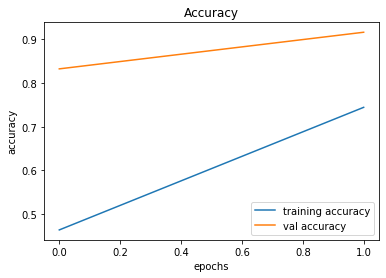

In [17]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

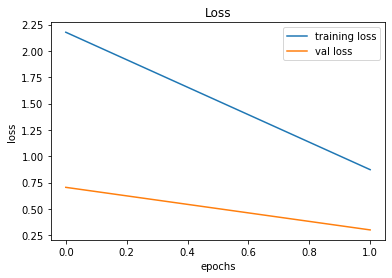

In [18]:
#plotting graphs for loss 
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [19]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

In [20]:
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)

In [21]:
#Accuracy with the test data
print(accuracy_score(labels, pred))

0.8714964370546319
